# Event sort

This page discusses the details of the using and implementing the event sorting approach.

In [5]:
from typing import Callable
from datetime import datetime
from matplotlib import pyplot as plt

## Example

Consider series of periods visualised on the following picture.

<svg width=700 height=200 stroke="black" stroke-width="3"
    style="font-family: 'LatinModern'" font-style="italic" font-size=30>
  <line x1=0 y1=150 x2=605 y2=150 />
    <line x1=605 y1=150 x2=574.75 y2=160 />
    <line x1=605 y1=150 x2=574.75 y2=140 />
  <g stroke-width="2">
    <line x1=30 y1=130 x2=300 y2=130 />
    <line x1=100 y1=110 x2=240 y2=110 />
    <line x1=180 y1=90 x2=360 y2=90 />
    <line x1=360 y1=130 x2=550 y2=130 />
    <g stroke-dasharray="4">
    <line x1=30 y1=130 x2=30 y2=150 />
      <line x1=300 y1=130 x2=300 y2=150 />
      <line x1=100 y1=110 x2=100 y2=150 />
      <line x1=240 y1=110 x2=240 y2=150 />
      <line x1=180 y1=90 x2=180 y2=150 />
      <line x1=360 y1=90 x2=360 y2=150 />
      <line x1=360 y1=130 x2=360 y2=150 />
      <line x1=550 y1=130 x2=550 y2=150 />
    </g>
  </g>
  <circle cx=30 cy=130 r=2 />
  <circle cx=300 cy=130 r=2 />
  <circle cx=100 cy=110 r=2 />
  <circle cx=240 cy=110 r=2 />
  <circle cx=180 cy=90 r=2 />
  <circle cx=360 cy=90 r=2 />
  <circle cx=360 cy=130 r=2 />
  <circle cx=550 cy=130 r=2 />
  <g stroke-width=0 text-anchor="middle">
    <text x=580 y=180>t</text>
    <text x=100 y=180>100</text>
    <text x=550 y=180>550</text>
    <text x=360 y=180>360</text>
    <text x=300 y=180>300</text>
    <text x=240 y=180>240</text>
    <text x=180 y=180>180</text>
    <text x=30 y=180>30</text>
  </g>
</svg>


Suppose you need to identify the time interval with the most simultaneous processes. The event-sort approach is a special solution this type of tasks.

---

The following cell shows the program's implementation and prints its output.

In [1]:
START, END = 0, 1
intervals = [(30, 300), (100, 240), (180, 360), (360, 550)]

events: list[tuple[int, int]] = []
for start, end in intervals:
    events.append((start, START))
    events.append((end, END))

events.sort()

max_count = 0
best_interval = (0, 0)
active_intervals = 0
for i, (e_moment, e_type) in enumerate(events):
    if (active_intervals > max_count) and (i != 0):
        max_count = active_intervals
        best_interval = (events[i - 1][0], e_moment)

    if e_type == START:
        active_intervals += 1
    else:  # e_type == END
        active_intervals -= 1


print(best_interval)

(180, 240)


## Two passes

There are some tasks for which the event-sorting approach can lead to quadratic complexity. These are tasks that require returning a set of objects corresponding to a specific state - so at each step, the conditions are checked and the current set is copied to the result set. In the worst case, the result set may need to be updated at every event, which results in quadratic complexity with respect to the number of events.

There are several approaches that can be used in specific cases, but the most universal solution is to go through the events twice: first, to determine the positions where the conditions are met, and second, to find the appropriate result based on those positions.

---

Consider the following task: given a set of time periods $(t_i, t'_i)$, find the set of indices of the periods that fall within the time interval where the maximum number of periods overlap.

The following cell defines the function that generates the events, as this code is shared by both solutions.

In [6]:
START, END = 0, 1

def construct_events(intervals: list[tuple[int, int]]) -> list[tuple[int, int, int]]:
    events: list[tuple[int, int, int]] = []
    for i, (start, end) in enumerate(intervals):
        events.append((start, START, i))
        events.append((end, END, i))
    return events

The following cell defines the basic solution. As previously described, it simply copies the best set of the items wheather a better solution is found.

In [7]:
def basic_solution(intervals: list[tuple[int, int]]) -> set[int]:
    events = construct_events(intervals)
    events.sort()

    intervals_set: set[int] = set()
    ans: set[int] = set()

    for _, e_type, i in events:
        if e_type == START:
            intervals_set.add(i)
        else:  # e_type == END
            intervals_set.remove(i)
        if len(intervals_set) > len(ans):
            ans = intervals_set.copy() # Notice that we copy the set here
    return ans

The next code uses the `basic_solution` function.

In [9]:
basic_solution([(30, 50), (100, 240), (180, 360), (360, 550)])

{1, 2}

But consider a really specific kind of input, as visualized in the following picture:

<svg width=700 height=200 stroke="black" stroke-width="3"
    style="font-family: 'LatinModern'" font-style="italic" font-size=30>
  <line x1=0 y1=150 x2=572 y2=150 />
    <line x1=572 y1=150 x2=543.4 y2=160 />
    <line x1=572 y1=150 x2=543.4 y2=140 />
  <g stroke-width="2">
    <line x1=30 y1=130 x2=400 y2=130 />
    <line x1=60 y1=110 x2=430 y2=110 />
    <line x1=90 y1=90 x2=460 y2=90 />
    <line x1=120 y1=70 x2=490 y2=70 />
    <line x1=150 y1=50 x2=520 y2=50 />
    <g stroke-dasharray="4">
    <line x1=30 y1=130 x2=30 y2=150 />
      <line x1=400 y1=130 x2=400 y2=150 />
      <line x1=60 y1=110 x2=60 y2=150 />
      <line x1=430 y1=110 x2=430 y2=150 />
      <line x1=90 y1=90 x2=90 y2=150 />
      <line x1=460 y1=90 x2=460 y2=150 />
      <line x1=120 y1=70 x2=120 y2=150 />
      <line x1=490 y1=70 x2=490 y2=150 />
      <line x1=150 y1=50 x2=150 y2=150 />
      <line x1=520 y1=50 x2=520 y2=150 />
    </g>
  </g>
  <circle cx=30 cy=130 r=2 />
  <circle cx=400 cy=130 r=2 />
  <circle cx=60 cy=110 r=2 />
  <circle cx=430 cy=110 r=2 />
  <circle cx=90 cy=90 r=2 />
  <circle cx=460 cy=90 r=2 />
  <circle cx=120 cy=70 r=2 />
  <circle cx=490 cy=70 r=2 />
  <circle cx=150 cy=50 r=2 />
  <circle cx=520 cy=50 r=2 />
  <g stroke-width=0 text-anchor="middle">
    <text x=580 y=180>t</text>
    <text x=25 y=175>t</text><text x=35 y=180 font-size=15>1</text>
    <text x=395 y=175>t'</text><text x=405 y=180 font-size=15>1</text>
    <text x=55 y=175>t</text><text x=65 y=180 font-size=15>2</text>
    <text x=425 y=175>t'</text><text x=435 y=180 font-size=15>2</text>
    <text x=85 y=175>t</text><text x=95 y=180 font-size=15>3</text>
    <text x=455 y=175>t'</text><text x=465 y=180 font-size=15>3</text>
    <text x=115 y=175>t</text><text x=125 y=180 font-size=15>4</text>
    <text x=485 y=175>t'</text><text x=495 y=180 font-size=15>4</text>
    <text x=145 y=175>t</text><text x=155 y=180 font-size=15>5</text>
    <text x=515 y=175>t'</text><text x=525 y=180 font-size=15>5</text>
  </g>
</svg>


With each event, a new element is added to the set. Therefore the algorithm is required to copy the accumulated elements to the answer for each of first five iterations.

The following cell defines a function that generates this type of input at a defined scale.

In [10]:
def generate_case(n: int) -> list[tuple[int, int]]:
    return [(i, n + i)for i in range(n)]

The next code implements the performance estimation function, that gradually increases the arrays generated by `generate_case`, and measures the time it takes to process the data.

In [11]:
def estimate_time_complexity(target: Callable[[list[tuple[int, int]]], set[int]]) -> list[tuple[int, float]]: 
    timings: list[tuple[int, float]] = []
    for i in range(1, 2_000):
        res: list[float] = []
        for _ in range(5):
            start = datetime.now()
            target(generate_case(i))
            end = datetime.now()
            res.append((end - start).total_seconds())
        timings.append((i, sum(res)/len(res)))
    return timings

The execution time progress related to the number of process intervals is displayed in the following cell.

Text(0, 0.5, 'Time (seconds)')

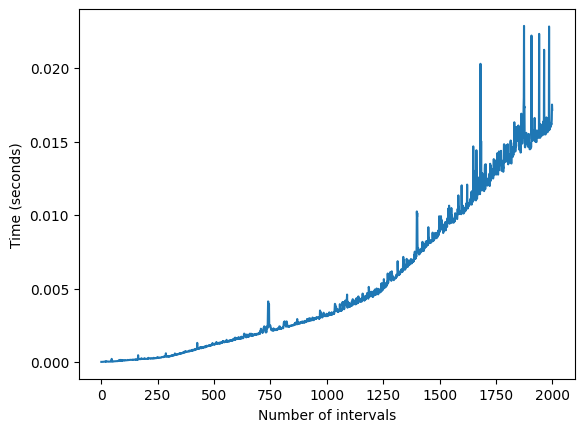

In [12]:
timings_basic = estimate_time_complexity(basic_solution)
plt.plot([x for x, _ in timings_basic], [y for _, y in timings_basic])
plt.xlabel('Number of intervals')
plt.ylabel('Time (seconds)')

There is a quadratic progression.

The approach that solves this issue is realized in the function below. It simply finds the maximum simultanious intervals and then accounts and returns the set of elements it consists of.

In [15]:
def two_pass(intervals: list[tuple[int, int]]) -> set[int]:
    events = construct_events(intervals)
    events.sort()

    intervals_set: set[int] = set()

    count = 0
    max_count = 0
    # First pass to find the maximum number of overlapping intervals
    for _, e_type, _ in events:
        if e_type == START:
            count += 1
        else:  # e_type == END
            count -= 1
        max_count = max(max_count, count)

    # Second pass to find the indices of intervals with the maximum overlap
    for _, e_type, i in events:
        if e_type == START:
            intervals_set.add(i)
        else:  # e_type == END
            intervals_set.remove(i)
        if len(intervals_set) == max_count:
            return intervals_set
    return set()

The results of applying the same test applied to the `two_pass` is displayed below.

In [16]:
timings_two_passes = estimate_time_complexity(two_pass)

Text(0, 0.5, 'Time (seconds)')

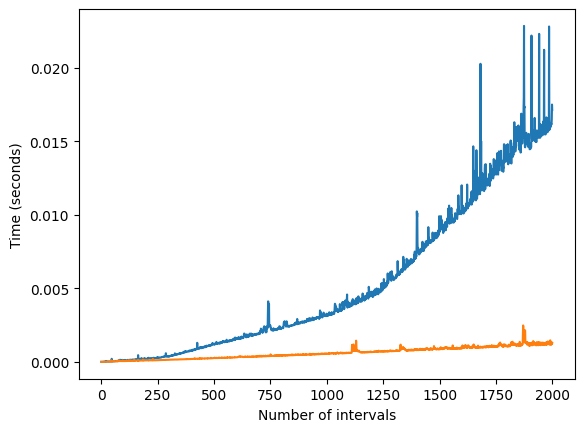

In [17]:
plt.plot([x for x, _ in timings_basic], [y for _, y in timings_basic])
plt.plot([x for x, _ in timings_two_passes], [y for _, y in timings_two_passes])
plt.xlabel('Number of intervals')
plt.ylabel('Time (seconds)')

Even if the exact complexities of the algorithms are not obvious, the `two_pass` approach certainly has better results here.